##1. Importing All Libraries

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


##2. Importing Dataset

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 9s 0us/step


##3.Data Exploration

In [0]:
len(np.unique(train_labels))

10

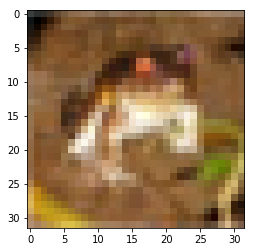

In [0]:
plt.imshow(train_features[0])

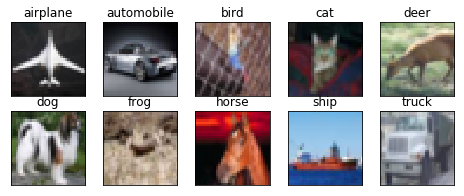

In [0]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

##4.Function to Plot and Evaluate the Model Accuracy and Loss Function

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

##5.Function to plot the Accuracy

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

##6.Pixel Normalization and Label Encoding

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

##7.Building and compiling the Model

In [0]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)        41568     
__________

##8.Evaluation of Model

Epoch 1/100
  5/390 [..............................] - ETA: 12s - loss: 2.0607 - acc: 0.2000

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  if sys.path[0] == '':


390/390 [==============================] - 9s 23ms/step - loss: 1.7136 - acc: 0.3497 - val_loss: 1.2899 - val_acc: 0.5244
Epoch 2/100
390/390 [==============================] - 9s 24ms/step - loss: 1.2941 - acc: 0.5331 - val_loss: 1.0693 - val_acc: 0.6144
Epoch 3/100
390/390 [==============================] - 9s 23ms/step - loss: 1.0917 - acc: 0.6156 - val_loss: 0.9134 - val_acc: 0.6770
Epoch 4/100
390/390 [==============================] - 9s 23ms/step - loss: 0.9647 - acc: 0.6664 - val_loss: 0.8673 - val_acc: 0.6974
Epoch 5/100
390/390 [==============================] - 9s 23ms/step - loss: 0.8654 - acc: 0.7040 - val_loss: 0.7598 - val_acc: 0.7354
Epoch 6/100
390/390 [==============================] - 9s 23ms/step - loss: 0.7956 - acc: 0.7268 - val_loss: 0.7551 - val_acc: 0.7434
Epoch 7/100
390/390 [==============================] - 9s 23ms/step - loss: 0.7463 - acc: 0.7446 - val_loss: 0.7581 - val_acc: 0.7434
Epoch 8/100
390/390 [==============================] - 9s 23ms/step - loss

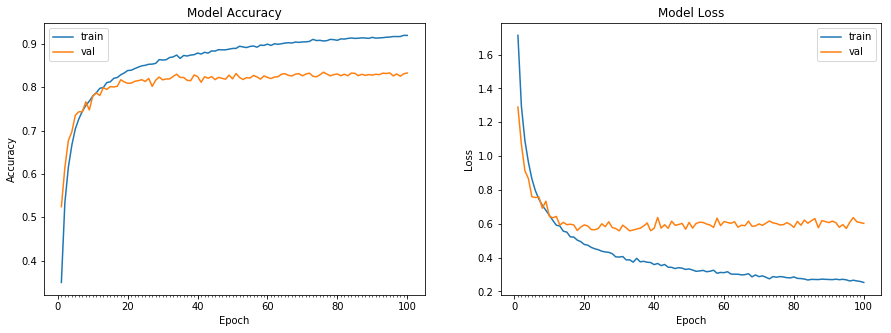

Accuracy on test data is: 83.28


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

##9.Changing the base model to fine tune and make architecture better

## * Changed above architecture.But, have not used Dropout here

In [0]:
from keras.layers import Activation
from keras.layers import BatchNormalization

# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))   #GRF-3
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(48, 3, 3))    #GRF - 5
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))   #GRF-10

model.add(Convolution2D(96, 3, 3, border_mode='same')) #GRF-12
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(96, 3, 3))  #GRF-14
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))  #GRF -28

model.add(Convolution2D(192, 3, 3, border_mode='same')) #GRF -30
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(192, 3, 3,border_mode='same')) #GRF-32
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))  #GRF -64
model.add(Convolution2D(48, 1, 1) )         #GRF-65

model.add(Convolution2D(48,3,3,border_mode='same'))  #GRF-67
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(10, 1,1)) #GRF-68
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(10, 3))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: Update your `Conv2D` call to the Kera

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 32, 32, 48)        1344      
_________________________________________________________________
batch_normalization_21 (Batc (None, 32, 32, 48)        192       
_________________________________________________________________
activation_21 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 30, 30, 48)        20784     
_________________________________________________________________
batch_normalization_22 (Batc (None, 30, 30, 48)        192       
_________________________________________________________________
activation_22 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 15, 15, 48)        0         
__________

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  if sys.path[0] == '':


Epoch 1/100
390/390 [==============================] - 18s 46ms/step - loss: 1.2161 - acc: 0.5634 - val_loss: 1.8363 - val_acc: 0.4665
Epoch 2/100
390/390 [==============================] - 13s 33ms/step - loss: 0.7546 - acc: 0.7368 - val_loss: 1.1549 - val_acc: 0.5994
Epoch 3/100
390/390 [==============================] - 12s 32ms/step - loss: 0.5736 - acc: 0.8023 - val_loss: 0.8528 - val_acc: 0.7175
Epoch 4/100
390/390 [==============================] - 13s 32ms/step - loss: 0.4595 - acc: 0.8415 - val_loss: 0.9237 - val_acc: 0.7076
Epoch 5/100
390/390 [==============================] - 13s 32ms/step - loss: 0.3703 - acc: 0.8720 - val_loss: 0.9708 - val_acc: 0.6944
Epoch 6/100
390/390 [==============================] - 13s 32ms/step - loss: 0.2826 - acc: 0.9023 - val_loss: 0.7710 - val_acc: 0.7584
Epoch 7/100
390/390 [==============================] - 13s 32ms/step - loss: 0.2216 - acc: 0.9233 - val_loss: 0.8487 - val_acc: 0.7450
Epoch 8/100
390/390 [==============================] - 

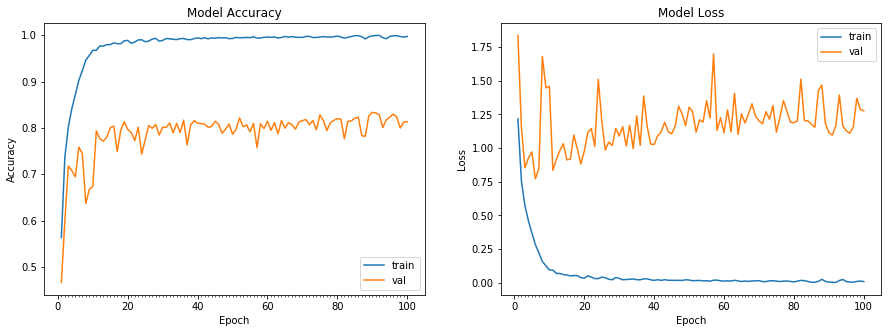

Accuracy on test data is: 81.32


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

##* Changed Placeholder of Dropout

In [0]:
from keras.layers import Activation
from keras.layers import BatchNormalization

# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))   #GRF-3
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(48, 3, 3))    #GRF - 5
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(MaxPooling2D(pool_size=(2, 2)))   #GRF-10

model.add(Convolution2D(96, 3, 3, border_mode='same')) #GRF-12
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(96, 3, 3))  #GRF-14
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(MaxPooling2D(pool_size=(2, 2)))  #GRF -28

model.add(Convolution2D(192, 3, 3, border_mode='same')) #GRF -30
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(192, 3, 3,border_mode='same')) #GRF-32
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(MaxPooling2D(pool_size=(2, 2)))  #GRF -64
model.add(Convolution2D(48, 1, 1) )         #GRF-65

model.add(Convolution2D(48,3,3,border_mode='same'))  #GRF-67
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(10, 1,1)) #GRF-68
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(10, 3))
model.add(Flatten())
model.add(Activation('softmax'))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3)

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  if sys.path[0] == '':


Epoch 1/100
390/390 [==============================] - 16s 42ms/step - loss: 1.2549 - acc: 0.5515 - val_loss: 1.1658 - val_acc: 0.5924
Epoch 2/100
390/390 [==============================] - 14s 37ms/step - loss: 0.7828 - acc: 0.7267 - val_loss: 1.0016 - val_acc: 0.6430
Epoch 3/100
390/390 [==============================] - 14s 37ms/step - loss: 0.6294 - acc: 0.7799 - val_loss: 0.7724 - val_acc: 0.7310
Epoch 4/100
390/390 [==============================] - 14s 37ms/step - loss: 0.5251 - acc: 0.8178 - val_loss: 0.9509 - val_acc: 0.6654
Epoch 5/100
390/390 [==============================] - 14s 37ms/step - loss: 0.4466 - acc: 0.8445 - val_loss: 1.1603 - val_acc: 0.6216
Epoch 6/100
390/390 [==============================] - 14s 37ms/step - loss: 0.3855 - acc: 0.8656 - val_loss: 0.7013 - val_acc: 0.7529
Epoch 7/100
390/390 [==============================] - 14s 37ms/step - loss: 0.3285 - acc: 0.8861 - val_loss: 0.7442 - val_acc: 0.7420
Epoch 8/100
390/390 [==============================] - 

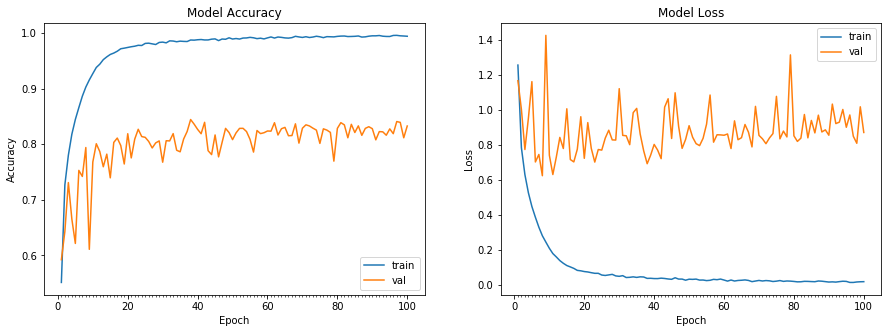

Accuracy on test data is: 83.27


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))